# 📚 Análisis Completo de los Datos

Un niño curioso quiere entender paso a paso sus análisis de datos. Todo está explicado en descripciones sencillas.

---

## 📥 1. Cargar Datos y Mostrar las Primeras Filas

**¿Para qué sirve?**

* El niño primero carga sus datos y revisa las primeras filas para conocer la estructura.

In [166]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("Dia3_Global_patients_cancer.csv", sep=",")
# Mostrar las primeras 15 filas
df.head(15)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
5,PT0000005,22,Male,Germany,2018,9.5,6.4,3.3,3.9,5.1,Cervical,Stage IV,33468.99,9.5,5.98
6,PT0000006,41,Male,Canada,2021,5.1,8.2,0.3,3.7,2.1,Cervical,Stage 0,9790.83,1.0,5.05
7,PT0000007,72,Female,Canada,2018,6.0,8.2,6.4,0.6,8.5,Prostate,Stage I,17161.40,6.2,6.02
8,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36
9,PT0000009,49,Female,Canada,2016,8.1,0.8,7.8,5.2,9.3,Prostate,Stage II,56133.45,5.7,5.76


> 👀 Esto le ayuda a ver columnas, tipos de datos y ejemplos de registros.

## 🔎 2. Tipos de Datos

**¿Para qué sirve?**

* Saber si cada columna es número (`int`, `float`) o texto (`object`).


In [167]:
# Tipos de cada columna en el DataFrame
df.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

> 🧩 Así sabe qué análisis estadístico puede aplicar a cada columna.


## 📈 3. Correlación Numérica

### 3.1. Matriz de Correlación Básica

**¿Para qué sirve?**

* Ver qué variables numéricas tienen relación lineal.

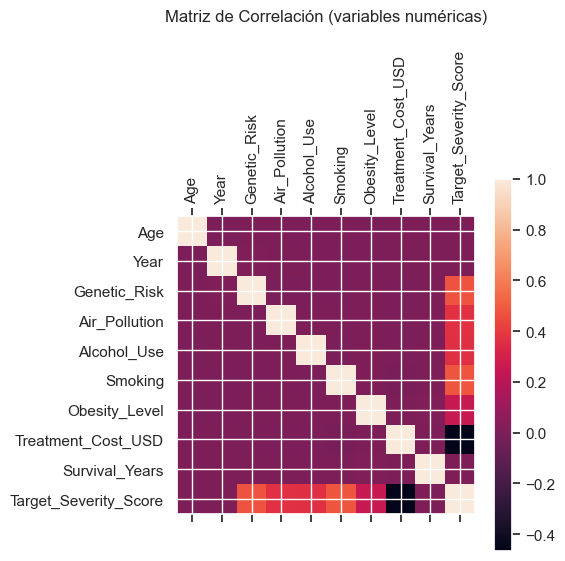

In [168]:
# Matriz de correlación solo con columnas numéricas
matriz = df.corr(numeric_only=True)
# Mostrarla como imagen
plt.matshow(matriz)
plt.colorbar()
plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=90)
plt.yticks(range(len(matriz.columns)), matriz.columns)
plt.title("Matriz de Correlación (variables numéricas)", pad=20)
plt.show()

### 3.2. Heatmap de Correlación

**¿Para qué sirve?**

* Mostrar los valores de correlación con colores y números.


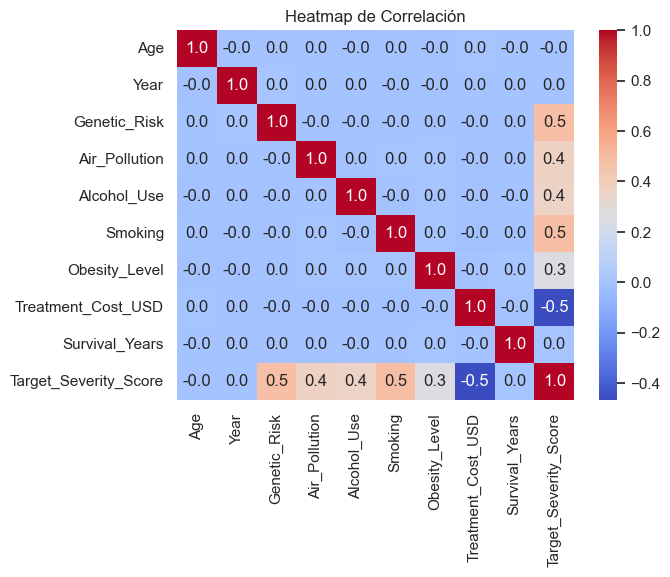

In [169]:
import seaborn as sns

sns.heatmap(matriz, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap de Correlación")
plt.show()

> 🎨 Ayuda a identificar rápidamente correlaciones fuertes o débiles.


## 🔗 4. Correlación entre Variables Categóricas

### 4.1. Contingencia con `crosstab` y Heatmap

**¿Para qué sirve?**

* Contar combinaciones entre categorías (ej. género y tipo de cáncer).


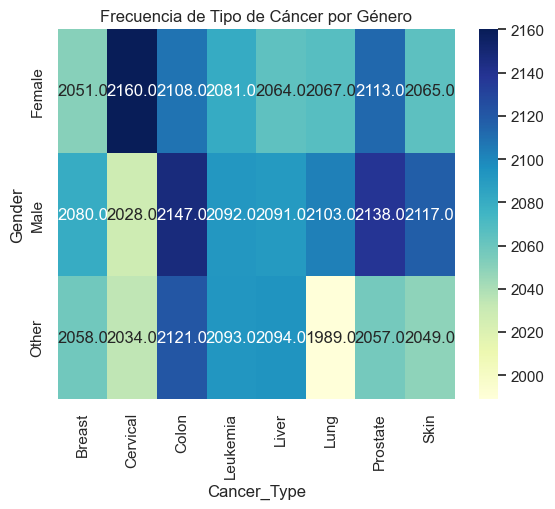

In [170]:
# Tabla de frecuencia
correlacion = pd.crosstab(df["Gender"], df["Cancer_Type"])
# Mostrar como heatmap
sns.heatmap(correlacion, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Frecuencia de Tipo de Cáncer por Género")
plt.ylabel("Gender")
plt.xlabel("Cancer_Type")
plt.show()

> 🔢 Indica cuántos pacientes de cada género tienen cada tipo de cáncer.


## 🧮 5. Pruebas de Correlación Estadística

### 5.1. Chi-cuadrada para Variables Categóricas

**¿Para qué sirve?**

* Ver si dos variables categóricas están relacionadas.

In [172]:
import numpy as np
from scipy.stats import chi2_contingency

# Aleatorizar y preparar los datos
np.random.seed(42)
df_titanic = pd.read_csv("Dia3_Titanic.csv").sample(frac=1)

# Crear columna Vivo copia de Survived
df_titanic["Vivo"] = df_titanic["2urvived"]

# Tabla de contingencia observada
observacion = pd.crosstab(df_titanic["Vivo"], df_titanic["Sex"], margins=True)

# Prueba Chi-cuadrado
test = chi2_contingency(observacion)

# Resultados esperados y porcentajes
esperados = pd.DataFrame(test[3])
observados_rel = round(observacion.apply(lambda r: r/len(df_titanic)*100, axis=1), 2)
esperados_rel = round(esperados.apply(lambda r: r/len(df_titanic)*100, axis=1), 2)

# Mostrar valor p formateado
print(f"Valor p (Chi-cuadrado): {test[1]:.40f}")

Valor p (Chi-cuadrado): 0.0000000000000000000000000000000000000000


**Interpretación para niño:**

* Si el **p-value < 0.05**, hay relación entre las categorías.
* El niño vio un p-value casi 0, así que **ser hombre o mujer influyó en sobrevivir**.

---

## 🔄 6. Gráficos de Dispersión y Regresión

**¿Para qué sirve?**

* Visualizar la relación entre dos variables numéricas y ajustar una recta que las describe.



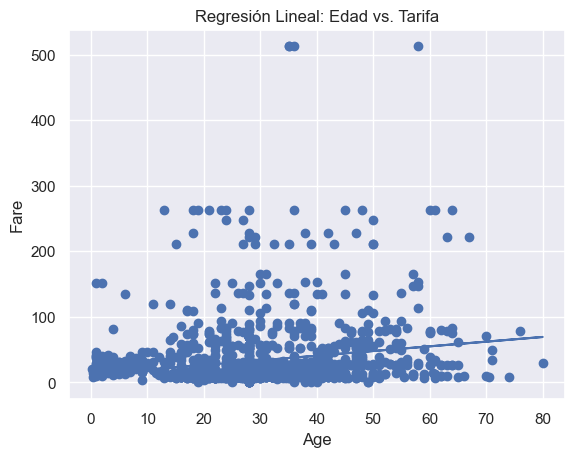

In [173]:
# Datos para regresión: x = Age, y = Fare
x = df_titanic["Age"]
y = df_titanic["Fare"]

# Calcular línea de regresión
coeffs = np.polyfit(x, y, 1)
slope, intercept = coeffs
reg_line = slope * x + intercept

# Graficar
plt.scatter(x, y)
plt.plot(x, reg_line)
plt.title("Regresión Lineal: Edad vs. Tarifa")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

**Interpretación:**

* Si la línea sube, hay relación positiva. Aquí es leve, lo que significa que **personas mayores pagaban un poco más** en promedio.

---

## 📊 7. ANOVA para Comparar Grupos

**¿Para qué sirve?**

* Saber si el **precio del boleto** (`Fare`) fue diferente según **sexo** y **supervivencia**, y si su combinación cambia algo.


In [174]:
import pingouin as pg
import seaborn as sns

# Preparar datos
df_anova = df_titanic[["Fare", "Sex", "2urvived"]].dropna()

# ANOVA de dos vías
aov = pg.anova(dv="Fare", between=["Sex", "2urvived"], data=df_anova, detailed=True)
pg.print_table(aov)


ANOVA SUMMARY

Source                   SS        DF         MS        F    p-unc      np2
--------------  -----------  --------  ---------  -------  -------  -------
Sex               55796.284     1.000  55796.284   21.809    0.000    0.016
2urvived          40823.207     1.000  40823.207   15.957    0.000    0.012
Sex * 2urvived     1513.753     1.000   1513.753    0.592    0.442    0.000
Residual        3338686.238  1305.000   2558.380  nan      nan      nan



**Interpretación del niño:**

* **Sex** y **Survived** tienen p-value < 0.05 → cada uno por separado afecta el precio.
* **Interacción** p-value > 0.05 → no se ve que la combinación cambie el efecto.

#### 🎯 Traducción clara:

* ✔️ **Ser mujer aumenta las chances de sobrevivir** → confirmado por **Chi²**.
* ✔️ **Los precios del boleto fueron distintos entre sexos y entre sobrevivientes** → confirmado por **ANOVA** (efectos principales).
* ❌ **Pero no hay prueba suficiente de que el efecto del sexo sobre el precio del boleto sea distinto entre sobrevivientes y no sobrevivientes** → el efecto es **independiente**.

---

#### 🧪 Metáfora simple:

Imagina dos cosas:

1. Las mujeres pagaban en promedio más que los hombres.
2. Los que sobrevivieron también pagaban más que los que no.

---

## 🏁 Resumen Final

1. **Correlaciones numéricas**: Matrices y heatmaps revelan relaciones lineales.
2. **Correlaciones categóricas**: Chi-cuadrado confirmó que sexo y supervivencia están relacionados.
3. **Regresión**: Línea sugiere relación leve entre edad y tarifa.
4. **ANOVA**: Sexo y sobrevivencia afectan tarifa, pero no su interacción.

El niño aprendió a usar gráficos y pruebas estadísticas para descubrir secretos en los datos. 🎉